In [1]:
import pickle
import yaml
from pprint import pprint

% matplotlib inline
import matplotlib.pyplot as plt


In [3]:
def BestT(N, B):
    import numpy as np
    return int(2 ** np.round(np.log2(B / np.log2(N))))

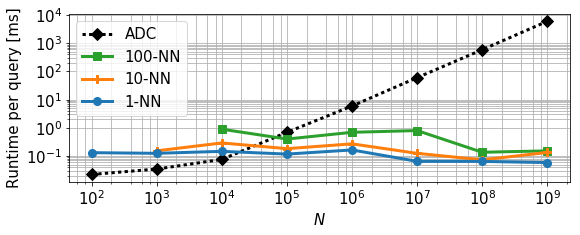

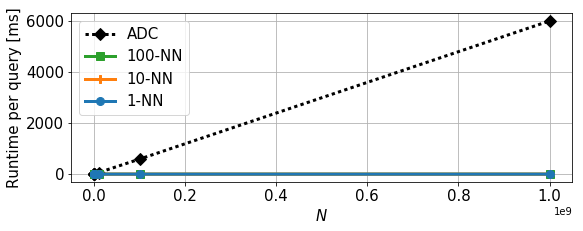

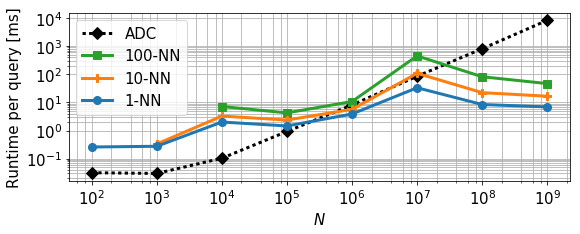

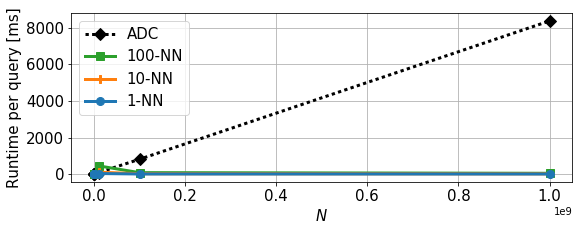

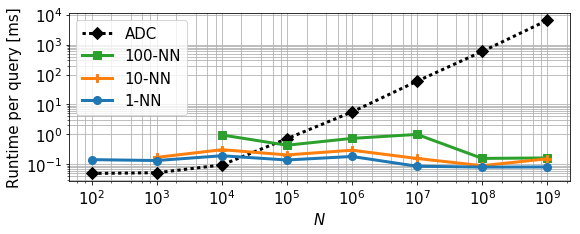

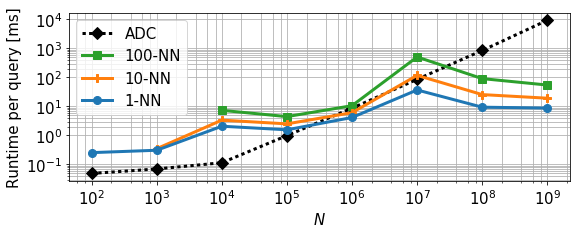

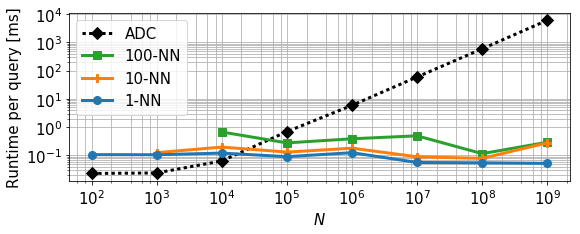

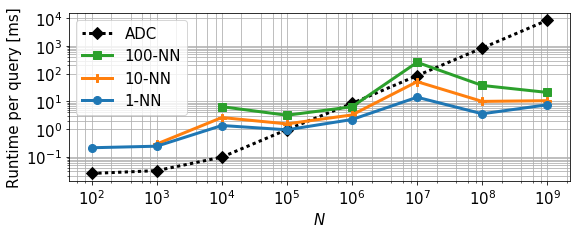

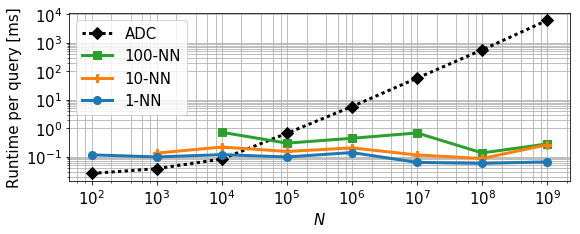

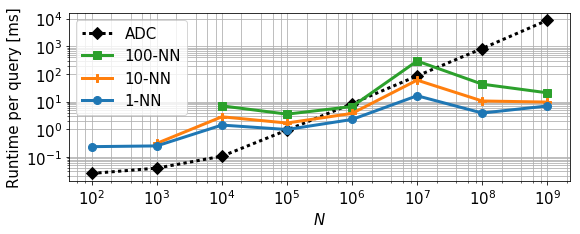

In [11]:
import itertools

for dataset, method, B , graphtype in itertools.product(['sift1b', 'deep1b'], ['pq', 'opq'], ['32', '64'], ['log', 'linear']):
#for dataset, method, B, graphtype in itertools.product(['sift1b'], ['pq'], ['32'], ['log']):
    if graphtype == 'linear' and not (dataset == 'sift1b' and method == 'pq'):
        continue
    plots = {}
    plots["topk1"] = yaml.load(open('dump/' + dataset + '/' + method + '/n_time_b' + B + '_topk1.yaml', 'rt'))["plots"]
    plots["topk10"] = yaml.load(open('dump/' + dataset + '/' + method + '/n_time_b' + B + '_topk10.yaml', 'rt'))["plots"]
    plots["topk100"] = yaml.load(open('dump/' + dataset + '/' + method + '/n_time_b' + B + '_topk100.yaml', 'rt'))["plots"]
    #pprint(plots_topk1)
    #pprint(plots_topk10)
    #pprint(plots_topk100)            
    
    # Params
    fontsize = 15
    linewidth = 3
    markersize = 8

    plt.figure(figsize=[8, 3])
        
    # Plot
    plt.plot(plots["topk1"]['adc']['x'], plots["topk1"]['adc']['y'], "D:", lw=linewidth, ms=markersize, label='ADC', color='black')
    for topk in ["topk100", "topk10", "topk1"]:
        color = {"topk1": "C0", "topk10": "C1", "topk100": "C2"}
        label = {"topk1": "1-NN", "topk10": "10-NN", "topk100": "100-NN"}
        marker = {"topk1": "o-", "topk10": "P-", "topk100": "s-"}
        Ns = [10**4, 10**5, 10**6, 10**7, 10**8, 10**9]
            
        if B == "32":
            Ys = [plots[topk]['T2']['y'][ plots[topk]['T2']['x'].index(10**4) ],
                  plots[topk]['T2']['y'][ plots[topk]['T2']['x'].index(10**5) ],
                  plots[topk]['T2']['y'][ plots[topk]['T2']['x'].index(10**6) ],
                  plots[topk]['T1']['y'][ plots[topk]['T1']['x'].index(10**7) ],
                  plots[topk]['T1']['y'][ plots[topk]['T1']['x'].index(10**8) ],
                  plots[topk]['T1']['y'][ plots[topk]['T1']['x'].index(10**9) ]]
        
            if topk == "topk1" or topk == "topk10":
                Ns.insert(0, 10**3)
                Ys.insert(0, plots[topk]['T4']['y'][ plots[topk]['T4']['x'].index(10**3) ])
        
            if topk == "topk1":
                Ns.insert(0, 10**2)
                Ys.insert(0, plots[topk]['T4']['y'][ plots[topk]['T4']['x'].index(10**2) ])

            plt.plot(Ns, Ys, marker[topk],
                     lw=linewidth, ms=markersize, label=label[topk], color=color[topk])
            
        elif B == "64":
            Ys = [plots[topk]['T4']['y'][ plots[topk]['T4']['x'].index(10**4) ],
                  plots[topk]['T4']['y'][ plots[topk]['T4']['x'].index(10**5) ],
                  plots[topk]['T4']['y'][ plots[topk]['T4']['x'].index(10**6) ],
                  plots[topk]['T2']['y'][ plots[topk]['T2']['x'].index(10**7) ],
                  plots[topk]['T2']['y'][ plots[topk]['T2']['x'].index(10**8) ],
                  plots[topk]['T2']['y'][ plots[topk]['T2']['x'].index(10**9) ]]
        
            if topk == "topk1" or topk == "topk10":
                Ns.insert(0, 10**3)
                Ys.insert(0, plots[topk]['T8']['y'][ plots[topk]['T8']['x'].index(10**3) ])
        
            if topk == "topk1":
                Ns.insert(0, 10**2)
                Ys.insert(0, plots[topk]['T8']['y'][ plots[topk]['T8']['x'].index(10**2) ])

            plt.plot(Ns, Ys, marker[topk],
                     lw=linewidth, ms=markersize, label=label[topk], color=color[topk])
    


    # Texts
    plt.xlabel('$N$', fontsize=fontsize)
    plt.ylabel('Runtime per query [ms]', fontsize=fontsize)
    plt.tick_params(labelsize=fontsize)

    # Legend
    # handlelength: if 0, delete line in legend.
    # To re-order items in legend, set landles and labels
    plt.legend(fontsize=fontsize, handlelength=2, loc='upper left')

    # Grid
    # which='both': show more grids (useful for log scaling)
    plt.grid(True, which='both')#, color='darkgray')

    # Log
    plt.xscale(graphtype)
    plt.yscale(graphtype)


#     # Ranges
    if graphtype != 'linear':
        plt.yticks([10**-1, 10**0, 10**1, 10**2, 10**3, 10**4])
#     plt.ylim([0.01, 10**4])

#     # Write
#     # Adjust white spaces when the text size is big. This is manually adjusted
#     # http://d.hatena.ne.jp/nohzen/20130922/1379807776
    plt.subplots_adjust(left=0.12, bottom=0.19, right=0.99, top=0.97, wspace=None, hspace=None)

    if graphtype == 'linear':
        plt.savefig("n_time_linear_" + dataset + "_" + method + "_b" + B + ".pdf")
    else:
        plt.savefig("n_time_" + dataset + "_" + method + "_b" + B + ".pdf")
    
